In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sujaykapadnis/flowers-image-classification

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/flowers-image-classification
License(s): Attribution 4.0 International (CC BY 4.0)
100% 218M/219M [00:07<00:00, 43.0MB/s]
100% 219M/219M [00:07<00:00, 31.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flowers-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2,
                             rotation_range=10, width_shift_range = 0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/content/flowers/flowers/flower_photos/train', target_size=(224,224), batch_size=4,
                                              class_mode="categorical", subset='training')

validation_generator = datagen.flow_from_directory('/content/flowers/flowers/flower_photos/train', target_size=(224,224), batch_size=4,
                                              class_mode="categorical", subset='validation')

Found 2834 images belonging to 5 classes.
Found 706 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
for layer in model_vgg16.layers:
  layer.trainable=False

model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model = Sequential()

model.add(model_vgg16)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


709/709 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.4234 - loss: 2.0576 - val_accuracy: 0.5297 - val_loss: 1.0374
Epoch 2/20
709/709 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.5484 - loss: 1.0661 - val_accuracy: 0.7025 - val_loss: 0.8015
Epoch 3/20
709/709 ━━━━━━━━━━━━━━━━━━━━ 54s 76ms/step - accuracy: 0.5924 - loss: 0.9562 - val_accuracy: 0.6926 - val_loss: 0.7680
Epoch 4/20
709/709 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.6350 - loss: 0.9017 - val_accuracy: 0.7691 - val_loss: 0.6578
Epoch 5/20
709/709 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6677 - loss: 0.8187 - val_accuracy: 0.7365 - val_loss: 0.7383
Epoch 6/20
709/709 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.6598 - loss: 0.8103 - val_accuracy: 0.7578 - val_loss: 0.7228
Epoch 7/20
709/709 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.6758 - loss: 0.7856 - val_accuracy: 0.7479 - val_loss: 0.6510
Epoch 8/20
709/709 ━━━━━━━━━━━━━━━━━━━━ 54s 76ms/step - accuracy: 0.6648 - loss: 0.7995 - val_accurac

177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step


<Figure size 1000x700 with 0 Axes>

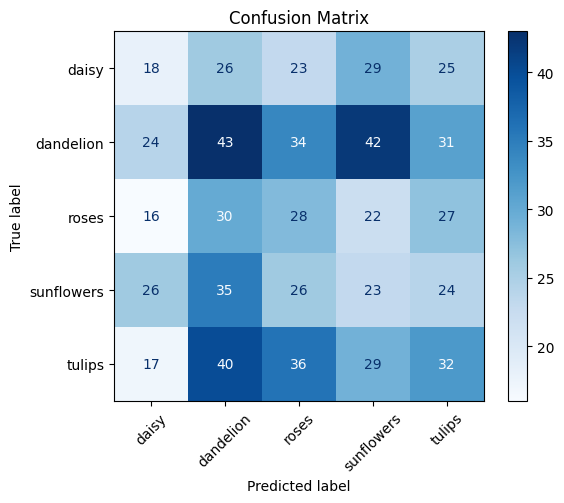

Classification Report:
               precision    recall  f1-score   support

       daisy       0.18      0.15      0.16       121
   dandelion       0.25      0.25      0.25       174
       roses       0.19      0.23      0.21       123
  sunflowers       0.16      0.17      0.16       134
      tulips       0.23      0.21      0.22       154

    accuracy                           0.20       706
   macro avg       0.20      0.20      0.20       706
weighted avg       0.20      0.20      0.20       706



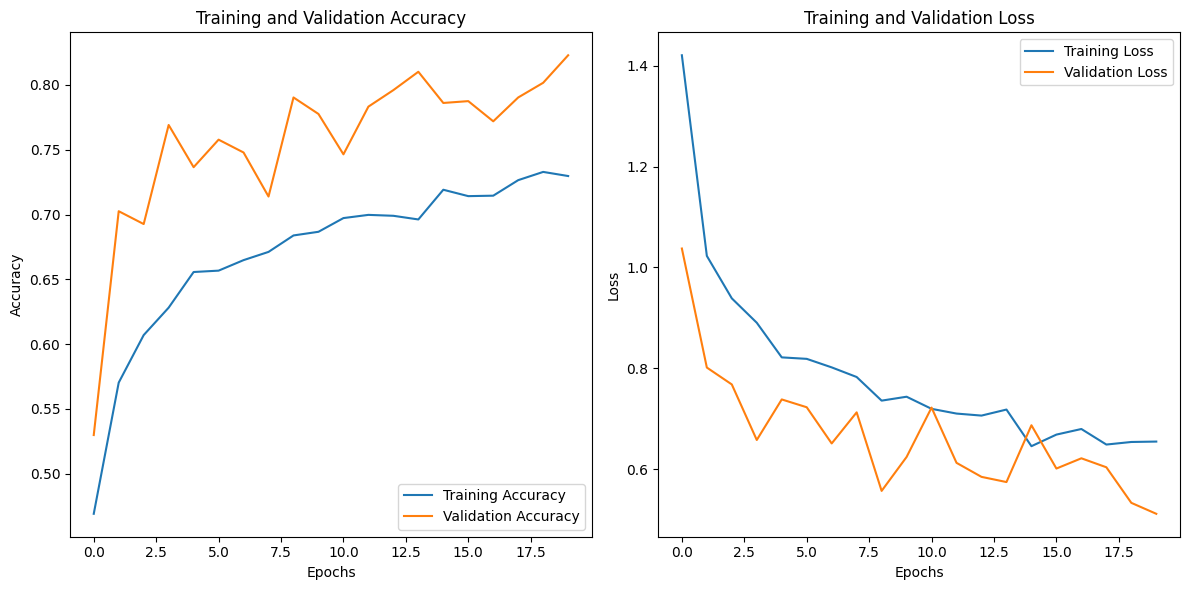

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resetting the validation generator
validation_generator.reset()

# Making predictions
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

# History metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plotting Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()
